<a href="https://colab.research.google.com/github/loopVER67/avarellweb/blob/main/Copy_of_Introduction_Data_Scientist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pengenalan Numpy,Panda, Matplotlib dan Seaborn

##Numpy

In [ ]:
import numpy as np

###Array


In [ ]:
array_1d = np.array([1, 2, 3, 4])
print("Array 1D : ", array_1d)

Array 1D :  [1 2 3 4]


In [ ]:
array_2d = np.array([[1,2],[3,4]])
print("Array 2D : \n", array_2d)

Array 2D : 
 [[1 2]
 [3 4]]


###Operasi Dengan Numpy

####np.Arange


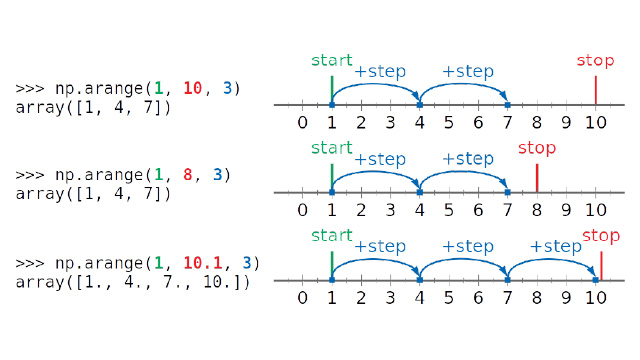

In [ ]:
print("np.arange(0,10,2) : ", np.arange(0,10,2))
#2 adalah jarak nilai

np.arange(0,10,2) :  [0 2 4 6 8]


###np.linspace()

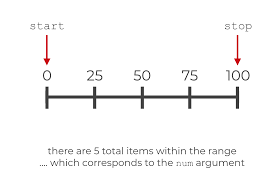

In [ ]:
print("np.linspace() :", np.linspace(0, 1, 2) )

np.linspace() : [0. 1.]


menghasilkan deret angka yang memiliki jarak sama besar dari start hingga stop, sebanyak num titik. <br>
start = 0 → titik awal dari deret

stop = 1 → titik akhir dari deret

num = 2 → jumlah total angka yang ingin dihasilkan

### reshape()

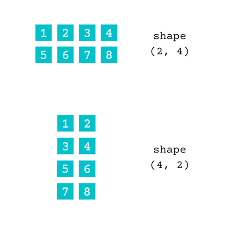

In [ ]:
array = np.arange(6)
print("np.reshape() |\n:",array.reshape(2, 3))

np.reshape() |
: [[0 1 2]
 [3 4 5]]


Fungsi np.arange(n) dari NumPy digunakan untuk menghasilkan array dari angka 0 hingga n-1. <br>
Fungsi reshape() digunakan untuk mengubah bentuk (dimensi) array tanpa mengubah data di dalamnya.

###np.random.rand()

In [ ]:
np.random.rand(2, 3)

array([[0.58338311, 0.79736598, 0.6481741 ],
       [0.79977884, 0.9025394 , 0.83118682]])

###np.dot()

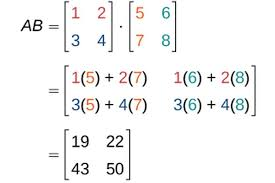

In [ ]:
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6], [7, 8]])
print("Array A")
print(a)
print("Array B")
print(b)
print("Hasil A dot B")
np.dot(a, b)

Array A
[[1 2]
 [3 4]]
Array B
[[5 6]
 [7 8]]
Hasil A dot B


array([[19, 22],
       [43, 50]])

###np.mean(), np.median(), np.std()

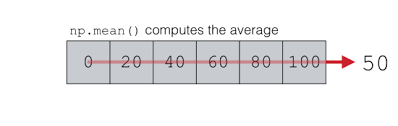

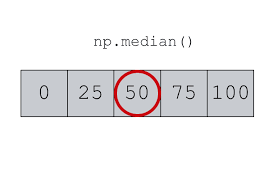

In [ ]:
array = np.array([1, 2, 3, 4, 5])
print(np.mean(array))   # Output: 3.0
print(np.median(array)) # Output: 3.0
print(np.std(array))    # Output: 1.414...

3.0
3.0
1.4142135623730951


##Pandas

In [ ]:
import pandas as pd

In [ ]:
#dictionary
data = {
    "Nama": ["Andi", "Budi", "Citra", "Dewi"],
    "Nilai": [85, 90, 78, 92],
    "Kelas": ["A", "B", "A", "B"]
}

In [ ]:
df = pd.DataFrame(data)
print("DataFrame:\n", df)
#0-3 adalah index

DataFrame:
     Nama  Nilai Kelas
0   Andi     85     A
1   Budi     90     B
2  Citra     78     A
3   Dewi     92     B


In [ ]:
print(df.head(3))

    Nama  Nilai Kelas
0   Andi     85     A
1   Budi     90     B
2  Citra     78     A


In [ ]:
print("\nDeskripsi Statistik:")
df.describe()


Deskripsi Statistik:


,Nilai
count,4.000000
mean,86.250000
std,6.238322
min,78.000000
25%,83.250000
50%,87.500000
75%,90.500000
max,92.000000


In [ ]:
# Grouping dan Agregasi
print("\nMengelompokkan Data Berdasarkan 'Kelas':")
print(df.groupby("Kelas")["Nilai"].mean())


Mengelompokkan Data Berdasarkan 'Kelas':
Kelas
A    81.5
B    91.0
Name: Nilai, dtype: float64


##Matplotlib dan seaborn

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

####Visualisasi Data


In [ ]:
np.random.seed(42)

num_rows = 300

dates = pd.date_range(start='2025-01-01', periods=num_rows).strftime('%Y-%m-%d')
regions= np.random.choice(['Jakarta','Surabaya','Yogyakarta','Malang'], size=num_rows)
products= np.random.choice(['Skintific','Wardah','Emina','Pigeon'], size=num_rows)
sales_quantity= np.random.randint(1,200,size=num_rows)
price= np.random.randint(50000,500000,size=num_rows)

#Buat Tabel atau DataFrame
data = pd.DataFrame({
    'Date':dates,
    'Region':regions,
    'Product':products,
    'Sales Quantity':sales_quantity,
    'Price':price
})
print(data)

           Date      Region    Product  Sales Quantity   Price
0    2025-01-01  Yogyakarta  Skintific             109  373673
1    2025-01-02      Malang  Skintific             116  414167
2    2025-01-03     Jakarta      Emina              94  396809
3    2025-01-04  Yogyakarta     Wardah              47  155787
4    2025-01-05  Yogyakarta     Wardah              99  212993
..          ...         ...        ...             ...     ...
295  2025-10-23      Malang     Pigeon             117  162581
296  2025-10-24    Surabaya  Skintific               8  315956
297  2025-10-25  Yogyakarta      Emina             122  471240
298  2025-10-26     Jakarta     Pigeon              92  239728
299  2025-10-27      Malang     Wardah             164  428292

[300 rows x 5 columns]


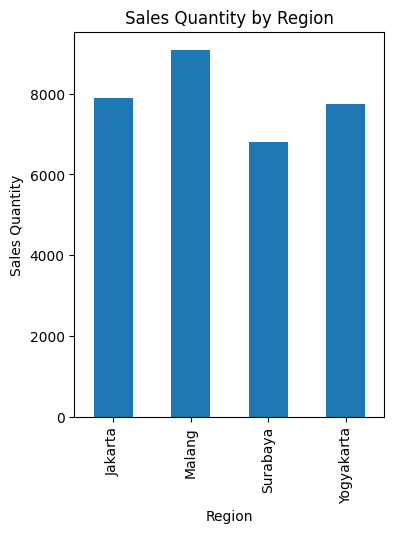

In [ ]:
sales_by_region = data.groupby('Region')['Sales Quantity'].sum()
sales_by_region.plot(kind="bar",figsize=(4,5))
plt.title('Sales Quantity by Region')
plt.xlabel('Region')
plt.ylabel('Sales Quantity')
plt.show()

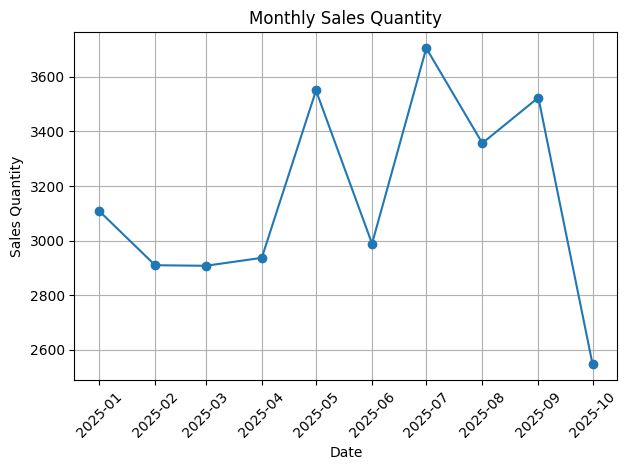

In [ ]:
# Konversi kolom 'Date' ke format datetime
data['Date'] = pd.to_datetime(data['Date'])

# Hitung total penjualan per bulan
monthly_sales = data.groupby(data['Date'].dt.to_period('M'))['Sales Quantity'].sum()
monthly_sales.index = monthly_sales.index.to_timestamp()

# Buat plot
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-')

# Tambahkan judul dan label
plt.title('Monthly Sales Quantity')
plt.xlabel('Date')
plt.ylabel('Sales Quantity')
plt.grid(True)
plt.xticks(rotation=45)

# Tampilkan grafik
plt.tight_layout()
plt.show()

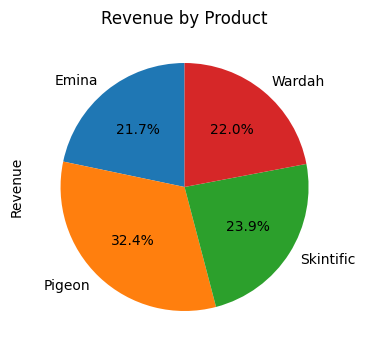

In [ ]:
data['Revenue'] = data['Sales Quantity'] * data['Price']
revenue_by_product = data.groupby('Product')['Revenue'].sum()
revenue_by_product.plot(kind="pie",figsize=(4,5),startangle=90,autopct='%1.1f%%')
plt.title('Revenue by Product')
plt.show()

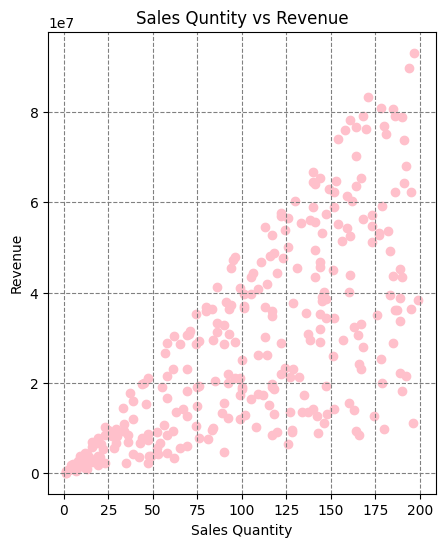

In [ ]:
plt.figure(figsize=(5,6))
plt.scatter(data['Sales Quantity'],data['Revenue'],color='pink')
plt.title('Sales Quntity vs Revenue')
plt.xlabel('Sales Quantity')
plt.ylabel('Revenue')
plt.grid(
    color='grey',
    linestyle='--')
plt.show()

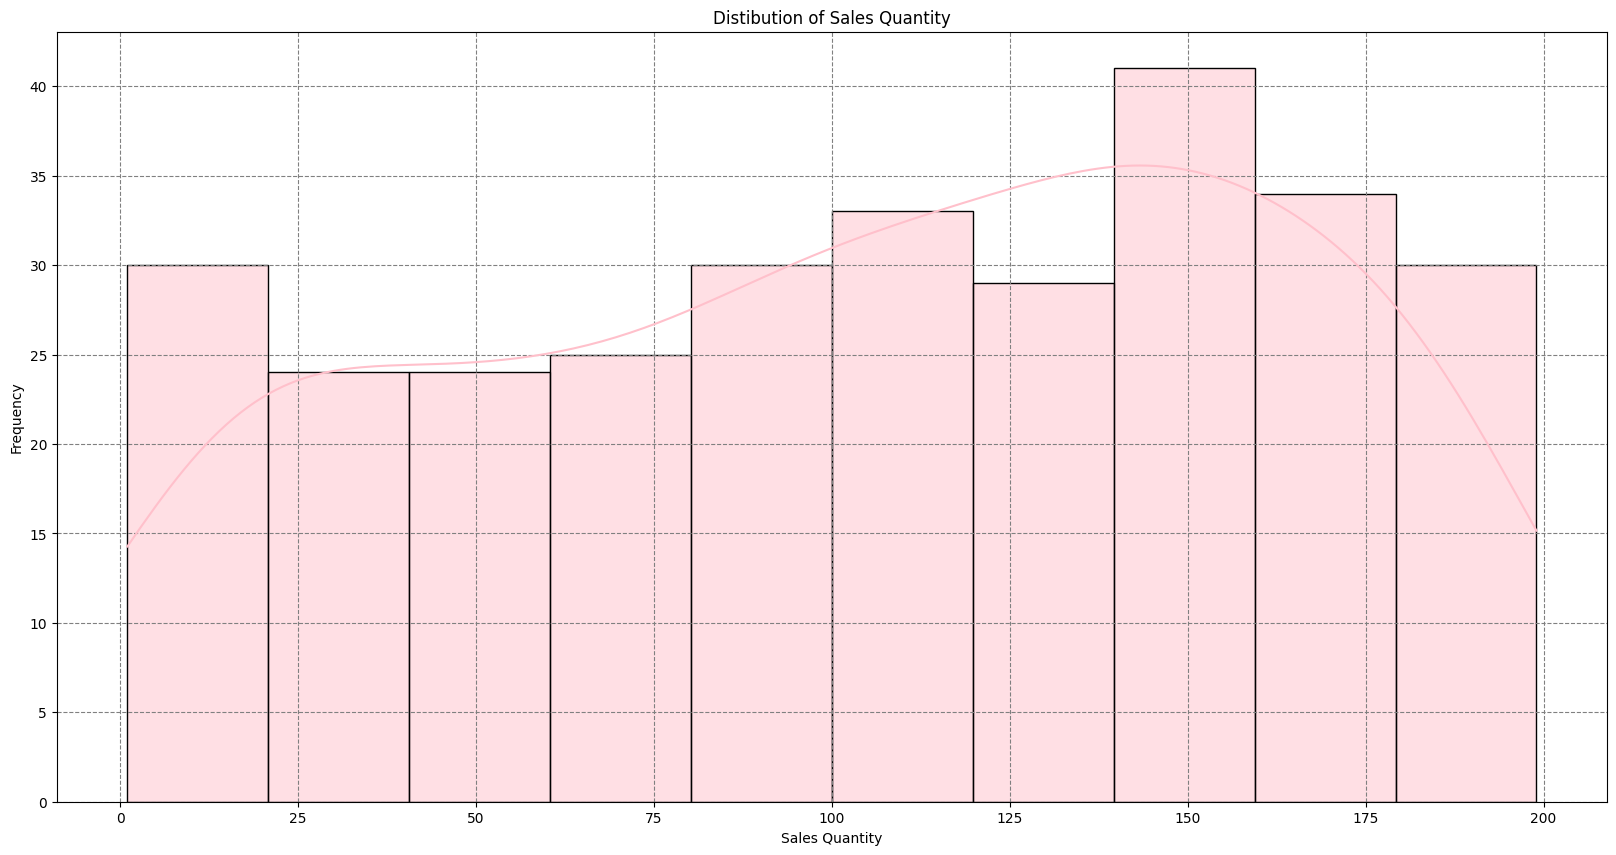

In [ ]:
plt.figure(figsize=(20,10))
sns.histplot(data['Sales Quantity'],bins=10,kde=True,color='pink')
plt.title('Distibution of Sales Quantity')
plt.xlabel('Sales Quantity')
plt.ylabel('Frequency')
plt.grid(color='grey',linestyle='--')
plt.show()

#Exploratory Data Analysis 1

#Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/RachmasariAR/Pelatihan4_DS/refs/heads/main/_dataset_pesanan.csv')
df

,ID Pelanggan,Nama,Jenis Kelamin,Makanan,Harga Makanan,Minuman,Harga Minuman,Total Bayar,Review
0,1,Nisa,P,Ayam bakar,16000.0,Jus,5000.0,21000,4.0
1,2,Isvi,P,Ayam geprek,16000.0,Es teler,7000.0,23000,5.0
2,3,Nawa,L,Nila bakar,15000.0,Es jeruk,4000.0,19000,3.0
3,4,Zayga,L,Ayam goreng,15000.0,Es buah,8000.0,23000,4.0
4,5,Dekhsa,L,Ayam geprek,16000.0,Es jeruk,4000.0,20000,5.0
5,6,Ulil,L,Lele goreng,11000.0,Es teh,3000.0,14000,2.0
6,7,Nibras,L,Lele bakar,12000.0,Es teh,3000.0,15000,1.0
7,8,Alwy,L,Ayam bakar,16000.0,Jus,5000.0,21000,4.0
8,9,Egi,L,Ayam bakar,16000.0,Es teler,7000.0,23000,3.0
9,10,Naufal,L,Nila bakar,15000.0,Es buah,8000.0,23000,5.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID Pelanggan   34 non-null     int64  
 1   Nama           34 non-null     object 
 2   Jenis Kelamin  34 non-null     object 
 3   Makanan        34 non-null     object 
 4   Harga Makanan  33 non-null     float64
 5   Minuman        34 non-null     object 
 6   Harga Minuman  33 non-null     float64
 7   Total Bayar    34 non-null     int64  
 8   Review         32 non-null     float64
dtypes: float64(3), int64(2), object(4)
memory usage: 2.5+ KB


In [ ]:
df.describe()

,ID Pelanggan,Harga Makanan,Harga Minuman,Total Bayar,Review
count,34.000000,33.000000,33.000000,34.000000,32.000000
mean,15.882353,14727.272727,5060.606061,19705.882353,3.343750
std,9.460491,1586.519919,1853.027825,2736.170867,1.095721
min,1.000000,11000.000000,3000.000000,14000.000000,1.000000
25%,8.250000,14000.000000,4000.000000,18000.000000,3.000000
50%,15.500000,15000.000000,4000.000000,20000.000000,3.000000
75%,23.750000,16000.000000,7000.000000,21750.000000,4.000000
max,32.000000,16000.000000,8000.000000,24000.000000,5.000000


#Cleaning Data

##Handle Mising Value

In [ ]:
df.isnull().sum()

,0
ID Pelanggan,0
Nama,0
Jenis Kelamin,0
Makanan,0
Harga Makanan,1
Minuman,0
Harga Minuman,1
Total Bayar,0
Review,2


##Mengetahui Data Null

In [ ]:
null_data = df[df.isnull().any(axis=1)]
null_data

,ID Pelanggan,Nama,Jenis Kelamin,Makanan,Harga Makanan,Minuman,Harga Minuman,Total Bayar,Review
10,11,Nico,L,Nila goreng,NaN,Es teh,3000.0,17000,3.0
15,16,Difa,L,Nila goreng,14000.0,Es teh,NaN,17000,4.0
20,20,Salman,L,Ayam geprek,16000.0,Jus,5000.0,21000,NaN
23,23,Tasya,P,Nila bakar,15000.0,Es buah,8000.0,23000,NaN


In [ ]:
df.loc[10, 'Harga Makanan'] = 14000
df.loc[15, 'Harga Minuman'] = 3000
df['Review'].fillna(df['Review'].median(), inplace=True)
df

<ipython-input-36-338c5ea064fe>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Review'].fillna(df['Review'].median(), inplace=True)


,ID Pelanggan,Nama,Jenis Kelamin,Makanan,Harga Makanan,Minuman,Harga Minuman,Total Bayar,Review
0,1,Nisa,P,Ayam bakar,16000.0,Jus,5000.0,21000,4.0
1,2,Isvi,P,Ayam geprek,16000.0,Es teler,7000.0,23000,5.0
2,3,Nawa,L,Nila bakar,15000.0,Es jeruk,4000.0,19000,3.0
3,4,Zayga,L,Ayam goreng,15000.0,Es buah,8000.0,23000,4.0
4,5,Dekhsa,L,Ayam geprek,16000.0,Es jeruk,4000.0,20000,5.0
5,6,Ulil,L,Lele goreng,11000.0,Es teh,3000.0,14000,2.0
6,7,Nibras,L,Lele bakar,12000.0,Es teh,3000.0,15000,1.0
7,8,Alwy,L,Ayam bakar,16000.0,Jus,5000.0,21000,4.0
8,9,Egi,L,Ayam bakar,16000.0,Es teler,7000.0,23000,3.0
9,10,Naufal,L,Nila bakar,15000.0,Es buah,8000.0,23000,5.0


In [ ]:
df.isnull().sum()

,0
ID Pelanggan,0
Nama,0
Jenis Kelamin,0
Makanan,0
Harga Makanan,0
Minuman,0
Harga Minuman,0
Total Bayar,0
Review,0


In [ ]:
df.duplicated().sum()

np.int64(2)

In [ ]:
df_duplicated = df[df.duplicated(subset='ID Pelanggan', keep=False)]
df_duplicated

,ID Pelanggan,Nama,Jenis Kelamin,Makanan,Harga Makanan,Minuman,Harga Minuman,Total Bayar,Review
2,3,Nawa,L,Nila bakar,15000.0,Es jeruk,4000.0,19000,3.0
8,9,Egi,L,Ayam bakar,16000.0,Es teler,7000.0,23000,3.0
17,3,Nawa,L,Nila bakar,15000.0,Es jeruk,4000.0,19000,3.0
33,9,Egi,L,Ayam bakar,16000.0,Es teler,7000.0,23000,3.0


In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

#Analisis Statistik Dasar

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, 0 to 32
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID Pelanggan   32 non-null     int64  
 1   Nama           32 non-null     object 
 2   Jenis Kelamin  32 non-null     object 
 3   Makanan        32 non-null     object 
 4   Harga Makanan  32 non-null     float64
 5   Minuman        32 non-null     object 
 6   Harga Minuman  32 non-null     float64
 7   Total Bayar    32 non-null     int64  
 8   Review         32 non-null     float64
dtypes: float64(3), int64(2), object(4)
memory usage: 2.5+ KB


In [ ]:
df['Makanan'].value_counts()

,count
Makanan,
Ayam geprek,7
Nila bakar,6
Ayam bakar,5
Nila goreng,5
Ayam goreng,4
Lele goreng,3
Lele bakar,2


In [ ]:
makanan_rep = {'Ayam geprek':0, 'Nila bakar':1, 'Ayam bakar':2, 'Nila goreng':3, 'Ayam goreng':4, 'Lele goreng':5,  'Lele bakar':6}
df = df.replace({'Makanan':makanan_rep})
df.head(6)

<ipython-input-43-85e2a35ec651>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'Makanan':makanan_rep})


,ID Pelanggan,Nama,Jenis Kelamin,Makanan,Harga Makanan,Minuman,Harga Minuman,Total Bayar,Review
0,1,Nisa,P,2,16000.0,Jus,5000.0,21000,4.0
1,2,Isvi,P,0,16000.0,Es teler,7000.0,23000,5.0
2,3,Nawa,L,1,15000.0,Es jeruk,4000.0,19000,3.0
3,4,Zayga,L,4,15000.0,Es buah,8000.0,23000,4.0
4,5,Dekhsa,L,0,16000.0,Es jeruk,4000.0,20000,5.0
5,6,Ulil,L,5,11000.0,Es teh,3000.0,14000,2.0


In [ ]:
df['Minuman'].value_counts()

,count
Minuman,
Es teh,9
Es jeruk,8
Jus,5
Es teler,5
Es buah,5


In [ ]:
minuman_rep ={'Es teh':0, 'Es jeruk':1, 'Jus':2, 'Es teler':3, 'Es buah':4}
df = df.replace({'Minuman':minuman_rep})
df.tail(6)

<ipython-input-45-4f970477df35>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'Minuman':minuman_rep})


,ID Pelanggan,Nama,Jenis Kelamin,Makanan,Harga Makanan,Minuman,Harga Minuman,Total Bayar,Review
27,27,Figo,L,0,16000.0,0,3000.0,19000,2.0
28,28,Dinda,P,3,14000.0,1,4000.0,18000,4.0
29,29,Faris,L,5,11000.0,0,3000.0,14000,2.0
30,30,Wahyu,L,1,15000.0,0,3000.0,18000,3.0
31,31,Humam,L,0,16000.0,1,4000.0,20000,4.0
32,32,Adib,L,2,16000.0,4,8000.0,24000,3.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, 0 to 32
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID Pelanggan   32 non-null     int64  
 1   Nama           32 non-null     object 
 2   Jenis Kelamin  32 non-null     object 
 3   Makanan        32 non-null     int64  
 4   Harga Makanan  32 non-null     float64
 5   Minuman        32 non-null     int64  
 6   Harga Minuman  32 non-null     float64
 7   Total Bayar    32 non-null     int64  
 8   Review         32 non-null     float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.5+ KB


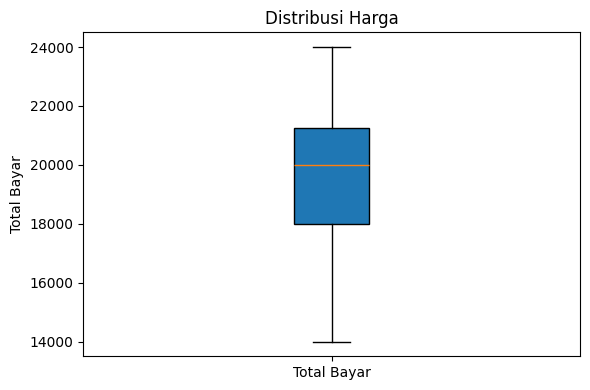

In [ ]:
box_plot_data = df['Total Bayar']

plt.figure(figsize=(6, 4))
plt.boxplot(box_plot_data, patch_artist=True)
plt.title("Distribusi Harga")
plt.ylabel("Total Bayar")
plt.xticks([1], ['Total Bayar'])  # Menambahkan label pada sumbu x
plt.tight_layout()
plt.show()

In [ ]:
data_relationship = df.drop(['Nama', 'Jenis Kelamin'], axis='columns')
data_relationship.corr()

,ID Pelanggan,Makanan,Harga Makanan,Minuman,Harga Minuman,Total Bayar,Review
ID Pelanggan,1.000000,0.043639,-0.102178,-0.141062,-0.134808,-0.150962,-0.152208
Makanan,0.043639,1.000000,-0.806261,-0.171251,-0.151818,-0.570892,-0.271448
Harga Makanan,-0.102178,-0.806261,1.000000,0.295202,0.254613,0.753183,0.345883
Minuman,-0.141062,-0.171251,0.295202,1.000000,0.992342,0.846234,0.218828
Harga Minuman,-0.134808,-0.151818,0.254613,0.992342,1.000000,0.827902,0.193827
Total Bayar,-0.150962,-0.570892,0.753183,0.846234,0.827902,1.000000,0.332455
Review,-0.152208,-0.271448,0.345883,0.218828,0.193827,0.332455,1.000000


Nilai korelasi berkisar dari -1 hingga 1:

1 → Hubungan positif sempurna

-1 → Hubungan negatif sempurna



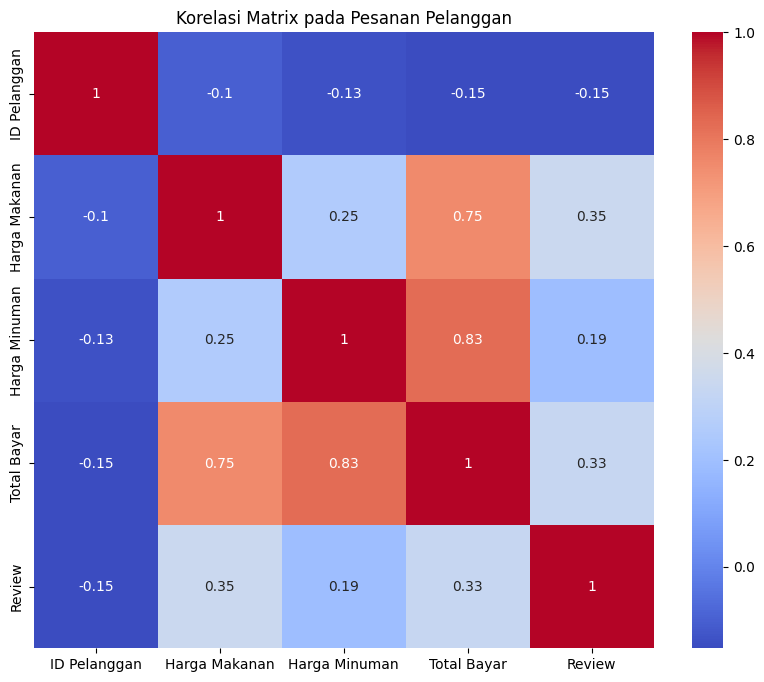

In [ ]:
corr_matrix = df[['ID Pelanggan', 'Harga Makanan', 'Harga Minuman', 'Total Bayar', 'Review']].corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Korelasi Matrix pada Pesanan Pelanggan')
plt.show()

#Visualisasi

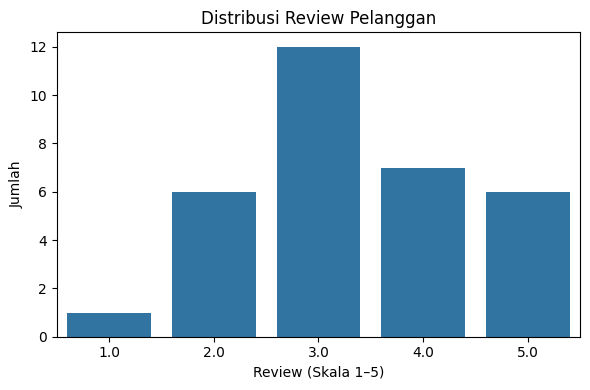

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Review', data=df)
plt.title('Distribusi Review Pelanggan')
plt.xlabel('Review (Skala 1–5)')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()

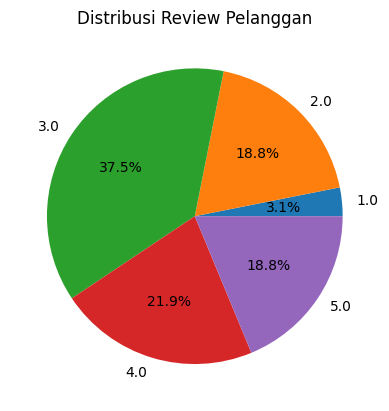

In [ ]:
import matplotlib.pyplot as plt

review_counts = df['Review'].value_counts().sort_index()

plt.pie(review_counts, labels=review_counts.index, autopct='%1.1f%%')
plt.title('Distribusi Review Pelanggan')
plt.show()


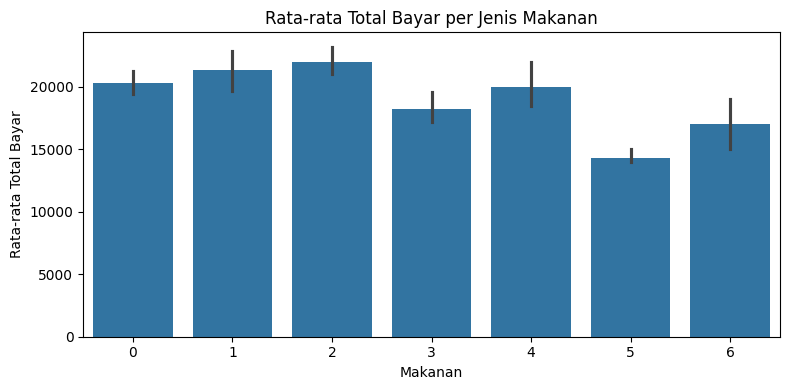

In [ ]:
plt.figure(figsize=(8, 4))
sns.barplot(x='Makanan', y='Total Bayar', data=df, estimator='mean')
plt.title('Rata-rata Total Bayar per Jenis Makanan')
plt.xlabel('Makanan')
plt.ylabel('Rata-rata Total Bayar')

plt.tight_layout()
plt.show()

In [ ]:
minuman_map = {0: 'Es teh', 1: 'Es jeruk', 2: 'Jus', 3: 'Es teler', 4: 'Es buah'}
df['Minuman'] = df['Minuman'].map(minuman_map)


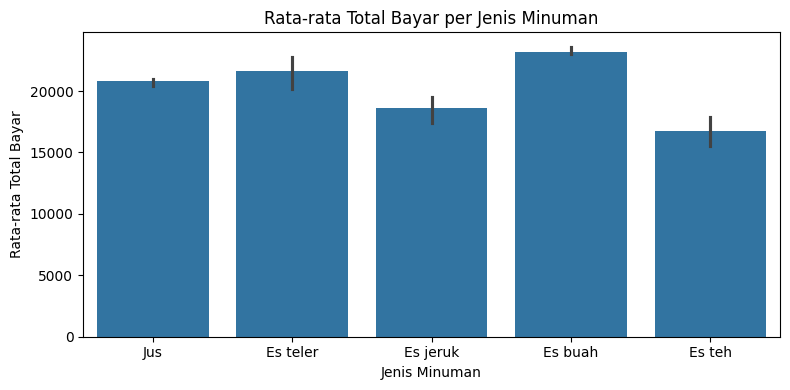

In [ ]:
plt.figure(figsize=(8, 4))
sns.barplot(x='Minuman', y='Total Bayar', data=df, estimator='mean')
plt.title('Rata-rata Total Bayar per Jenis Minuman')
plt.xlabel('Jenis Minuman')
plt.ylabel('Rata-rata Total Bayar')
plt.tight_layout()
plt.show()

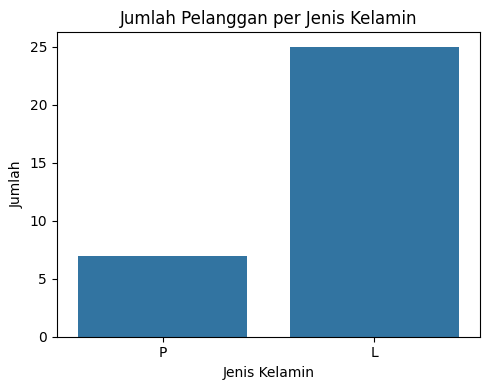

In [ ]:
plt.figure(figsize=(5, 4))
sns.countplot(x='Jenis Kelamin', data=df)
plt.title('Jumlah Pelanggan per Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()


#Kelar !!! 🎉🎉🎉

### Ada Challange Nihh

btw challengenya dapet hadiah juga

https://colab.research.google.com/drive/1KINcXoTBd5VVZhlrRQ2ftpmIj4IUsc93#scrollTo=YnteZzRGoI8K